Get Data

In [51]:
import pandas as pd

path = "/content/jqxScheduler.csv"
df = pd.read_csv(path)
df

,start,end,sectime,subject
0,2024-04-01T00:00:00,2024-04-01T00:00:00,20240401,Temp(A): 32.5 'C
1,2024-04-01T00:00:00,2024-04-01T00:00:00,20240401,Temp(M): 37.0 'C
2,2024-04-01T00:00:00,2024-04-01T00:00:00,20240401,Temp(N): 29.1 'C
3,2024-04-01T00:00:00,2024-04-01T00:00:00,20240401,Humi: 64.5 %
4,2024-04-01T00:00:00,2024-04-01T00:00:00,20240401,Prec: 0.0 mm
...,...,...,...,...
157,2024-04-27T00:00:00,2024-04-27T00:00:00,20240427,Temp(M): 37.0 'C
158,2024-04-27T00:00:00,2024-04-27T00:00:00,20240427,Temp(N): 31.2 'C
159,2024-04-27T00:00:00,2024-04-27T00:00:00,20240427,Humi: 61.5 %
160,2024-04-27T00:00:00,2024-04-27T00:00:00,20240427,Prec: 0.0 mm


Data Preprocessing

In [52]:
data = df['subject']
print(len(df))
data

162


0      Temp(A): 32.5 'C
1      Temp(M): 37.0 'C
2      Temp(N): 29.1 'C
3          Humi: 64.5 %
4          Prec: 0.0 mm
             ...       
157    Temp(M): 37.0 'C
158    Temp(N): 31.2 'C
159        Humi: 61.5 %
160        Prec: 0.0 mm
161    Pres: 1004.7 hPa
Name: subject, Length: 162, dtype: object

In [53]:
dt = []
tempA =[]
tempN =[]
humi =[]
prec= []
pres =[]
for i in range(len(df)):
  dt.append(df['subject'][i])
  # print(df['subject'][i])
  if "(M)" in df['subject'][i]:
    tempA.append(df['subject'][i])
  elif "(N)" in df['subject'][i]:
    tempN.append(df['subject'][i])
  elif "Humi" in df['subject'][i]:
    humi.append(df['subject'][i])
  elif "Prec" in df['subject'][i]:
    prec.append(df['subject'][i])
  elif "Pres" in df['subject'][i]:
    pres.append(df['subject'][i])
print(dt)
print(tempA)
print(tempN)
print(humi)
print(prec)
print(pres)

["Temp(A): 32.5 'C", "Temp(M): 37.0 'C", "Temp(N): 29.1 'C", 'Humi: 64.5 %', 'Prec: 0.0 mm', 'Pres: 1007.0 hPa', "Temp(A): 32.0 'C", "Temp(M): 36.4 'C", "Temp(N): 29.3 'C", 'Humi: 67.4 %', 'Prec: 0.0 mm', 'Pres: 1006.6 hPa', "Temp(A): 31.7 'C", "Temp(M): 36.0 'C", "Temp(N): 29.2 'C", 'Humi: 70.3 %', 'Prec: 0.0 mm', 'Pres: 1007.1 hPa', "Temp(A): 31.7 'C", "Temp(M): 35.9 'C", "Temp(N): 29.2 'C", 'Humi: 70.2 %', 'Prec: 0.0 mm', 'Pres: 1006.6 hPa', "Temp(A): 31.8 'C", "Temp(M): 35.5 'C", "Temp(N): 29.7 'C", 'Humi: 70.8 %', 'Prec: 0.0 mm', 'Pres: 1006.3 hPa', "Temp(A): 32.0 'C", "Temp(M): 36.2 'C", "Temp(N): 29.7 'C", 'Humi: 68.8 %', 'Prec: 0.0 mm', 'Pres: 1006.5 hPa', "Temp(A): 32.3 'C", "Temp(M): 37.2 'C", "Temp(N): 29.5 'C", 'Humi: 65.7 %', 'Prec: 0.0 mm', 'Pres: 1006.8 hPa', "Temp(A): 32.8 'C", "Temp(M): 37.5 'C", "Temp(N): 29.8 'C", 'Humi: 59.8 %', 'Prec: 0.0 mm', 'Pres: 1007.3 hPa', "Temp(A): 32.7 'C", "Temp(M): 37.0 'C", "Temp(N): 30.2 'C", 'Humi: 65.3 %', 'Prec: 0.0 mm', 'Pres: 1007

In [54]:
tempA = [float(n.split()[1]) for n in tempA]
tempN = [float(n.split()[1]) for n in tempN]
humi = [float(n.split()[1]) for n in humi]
prec = [float(n.split()[1]) for n in prec]
pres = [float(n.split()[1]) for n in pres]
days = list(range(1, 28))

print(tempA,tempN,humi,pres)

[37.0, 36.4, 36.0, 35.9, 35.5, 36.2, 37.2, 37.5, 37.0, 37.5, 38.2, 37.0, 37.2, 36.4, 36.9, 36.5, 36.5, 37.0, 37.0, 38.2, 39.7, 37.4, 37.2, 37.5, 38.0, 37.5, 37.0] [29.1, 29.3, 29.2, 29.2, 29.7, 29.7, 29.5, 29.8, 30.2, 29.2, 29.5, 29.8, 30.0, 30.0, 29.2, 29.8, 30.0, 30.2, 30.0, 30.2, 30.3, 30.5, 30.2, 29.7, 29.3, 30.3, 31.2] [64.5, 67.4, 70.3, 70.2, 70.8, 68.8, 65.7, 59.8, 65.3, 65.4, 63.9, 67.1, 64.4, 64.7, 66.1, 64.3, 64.2, 63.4, 64.6, 60.9, 55.9, 64.4, 65.5, 64.3, 60.8, 63.0, 61.5] [1007.0, 1006.6, 1007.1, 1006.6, 1006.3, 1006.5, 1006.8, 1007.3, 1007.9, 1009.1, 1008.9, 1008.2, 1008.1, 1008.7, 1008.8, 1007.4, 1007.0, 1005.3, 1004.6, 1004.7, 1005.0, 1005.3, 1005.1, 1005.7, 1005.5, 1005.1, 1004.7]


In [55]:
df_result = pd.DataFrame({'Date': days, 'tempA': tempA, 'tempN': tempN, 'Humi': humi, 'Prec': prec, 'Pres':pres})
print(df_result)

    Date  tempA  tempN  Humi  Prec    Pres
0      1   37.0   29.1  64.5   0.0  1007.0
1      2   36.4   29.3  67.4   0.0  1006.6
2      3   36.0   29.2  70.3   0.0  1007.1
3      4   35.9   29.2  70.2   0.0  1006.6
4      5   35.5   29.7  70.8   0.0  1006.3
5      6   36.2   29.7  68.8   0.0  1006.5
6      7   37.2   29.5  65.7   0.0  1006.8
7      8   37.5   29.8  59.8   0.0  1007.3
8      9   37.0   30.2  65.3   0.0  1007.9
9     10   37.5   29.2  65.4   0.0  1009.1
10    11   38.2   29.5  63.9   0.0  1008.9
11    12   37.0   29.8  67.1   0.0  1008.2
12    13   37.2   30.0  64.4   0.0  1008.1
13    14   36.4   30.0  64.7   0.0  1008.7
14    15   36.9   29.2  66.1   0.0  1008.8
15    16   36.5   29.8  64.3   0.0  1007.4
16    17   36.5   30.0  64.2   0.0  1007.0
17    18   37.0   30.2  63.4   0.0  1005.3
18    19   37.0   30.0  64.6   0.0  1004.6
19    20   38.2   30.2  60.9   0.0  1004.7
20    21   39.7   30.3  55.9   0.0  1005.0
21    22   37.4   30.5  64.4   0.0  1005.3
22    23   

EDA

In [56]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    27 non-null     int64  
 1   tempA   27 non-null     float64
 2   tempN   27 non-null     float64
 3   Humi    27 non-null     float64
 4   Prec    27 non-null     float64
 5   Pres    27 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.4 KB


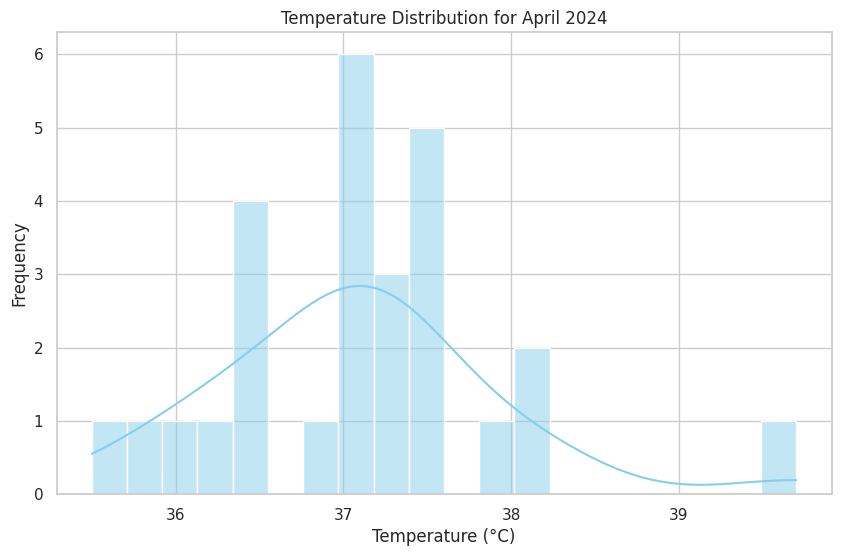

In [89]:
#TempA
plt.figure(figsize=(10, 6))
sns.histplot(tempA, bins=20, kde=True, color='skyblue')
plt.title('Temperature Distribution for April 2024')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

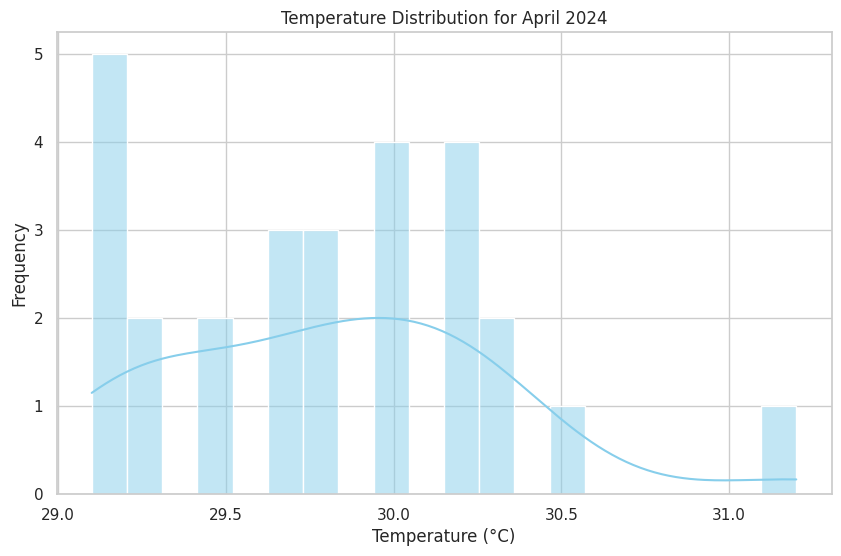

In [90]:
#TempN
plt.figure(figsize=(10, 6))
sns.histplot(tempN, bins=20, kde=True, color='skyblue')
plt.title('Temperature Distribution for April 2024')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

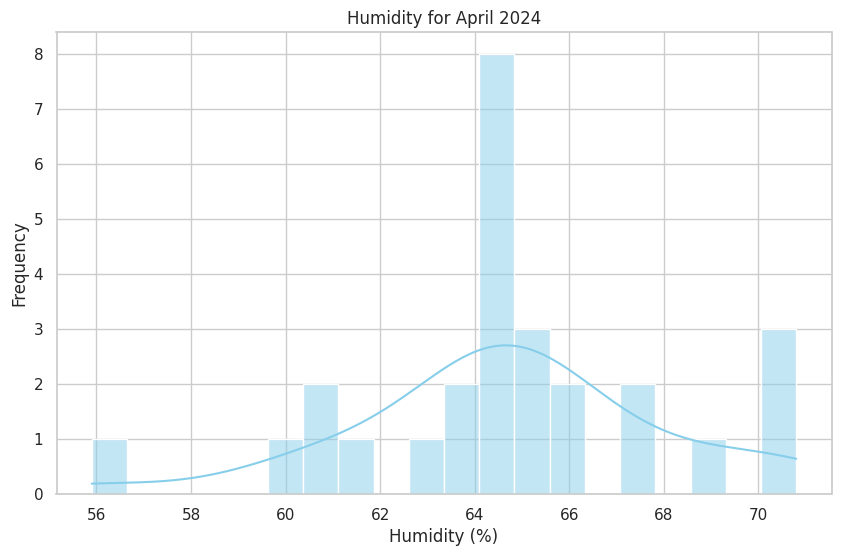

In [91]:
#Humid
plt.figure(figsize=(10, 6))
sns.histplot(humi, bins=20, kde=True, color='skyblue')
plt.title('Humidity for April 2024')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

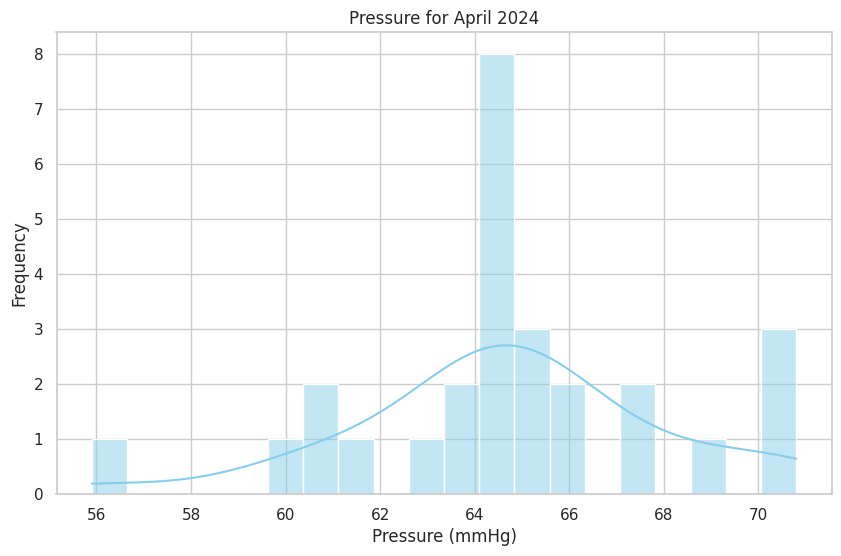

In [92]:
#Pres
plt.figure(figsize=(10, 6))
sns.histplot(humi, bins=20, kde=True, color='skyblue')
plt.title('Pressure for April 2024')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Data Visualization

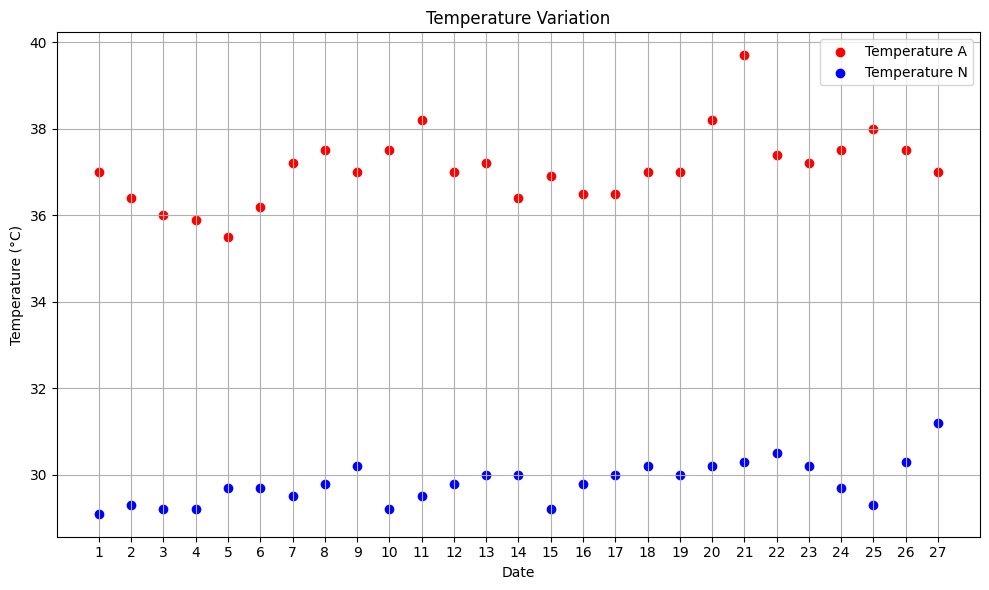

In [57]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(days, tempA, color='red', label='Temperature A')  # Scatter plot with customized color and label
plt.scatter(days, tempN, color='blue', label='Temperature N')  # Scatter plot with customized color and label
plt.title('Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(days)  # Set x-axis ticks to be exactly the days provided
plt.grid(True)  # Add grid for better visualization
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

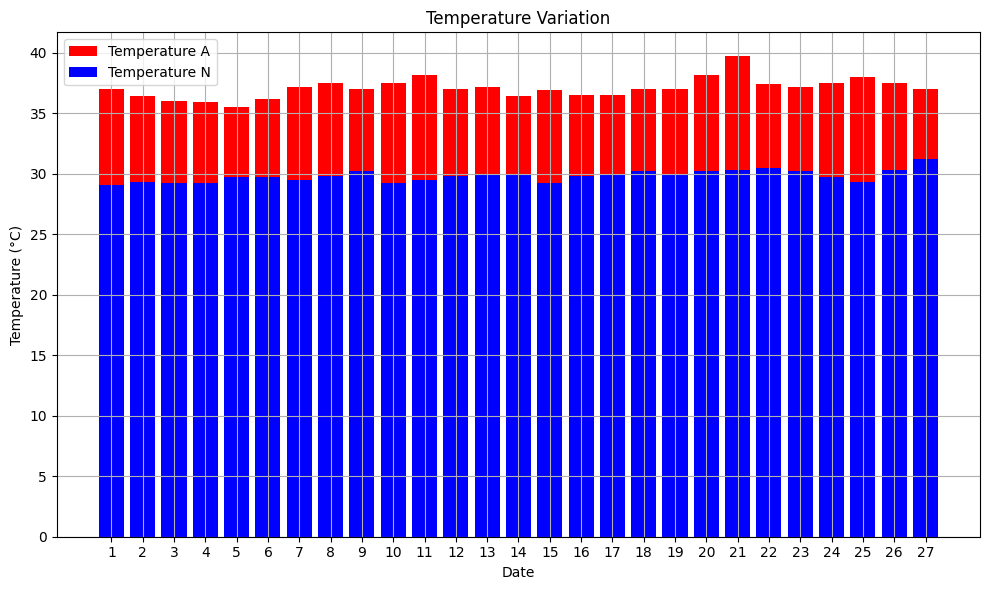

In [64]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(days, tempA, color='red', label='Temperature A', align='center')  # Scatter plot with customized color and label
plt.bar(days, tempN, color='blue', label='Temperature N', align='center')  # Scatter plot with customized color and label
plt.title('Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(days)  # Set x-axis ticks to be exactly the days provided
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

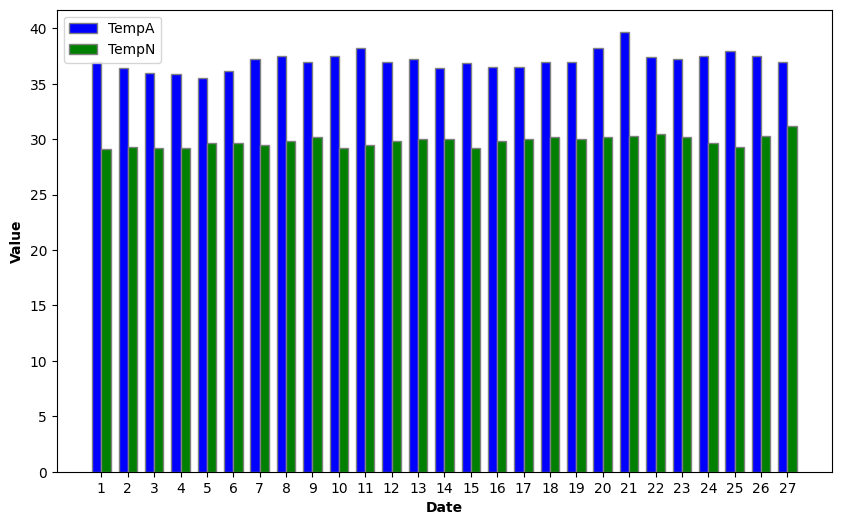

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Set the width of the bars
bar_width = 0.35

r1 = np.arange(len(tempA))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, tempA, color='b', width=bar_width, edgecolor='grey', label='TempA')
plt.bar(r2, tempN, color='g', width=bar_width, edgecolor='grey', label='TempN')

# Adding labels
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(tempA))], days)

# Adding legend
plt.legend()

# Showing plot
plt.show()


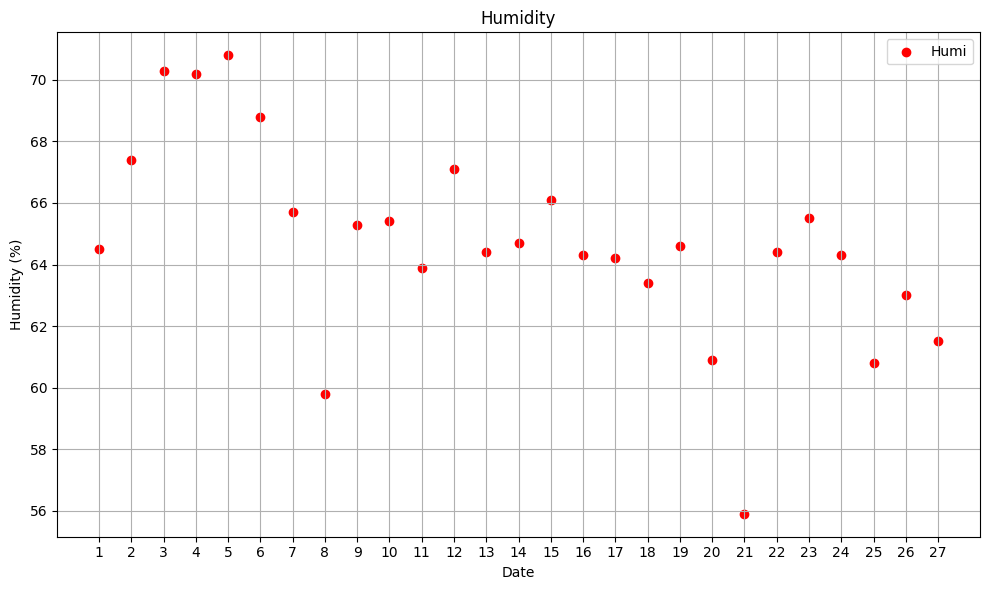

In [58]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(days, humi, color='red', label='Humi')  # Scatter plot with customized color and label
plt.title('Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.xticks(days)  # Set x-axis ticks to be exactly the days provided
plt.grid(True)  # Add grid for better visualization
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

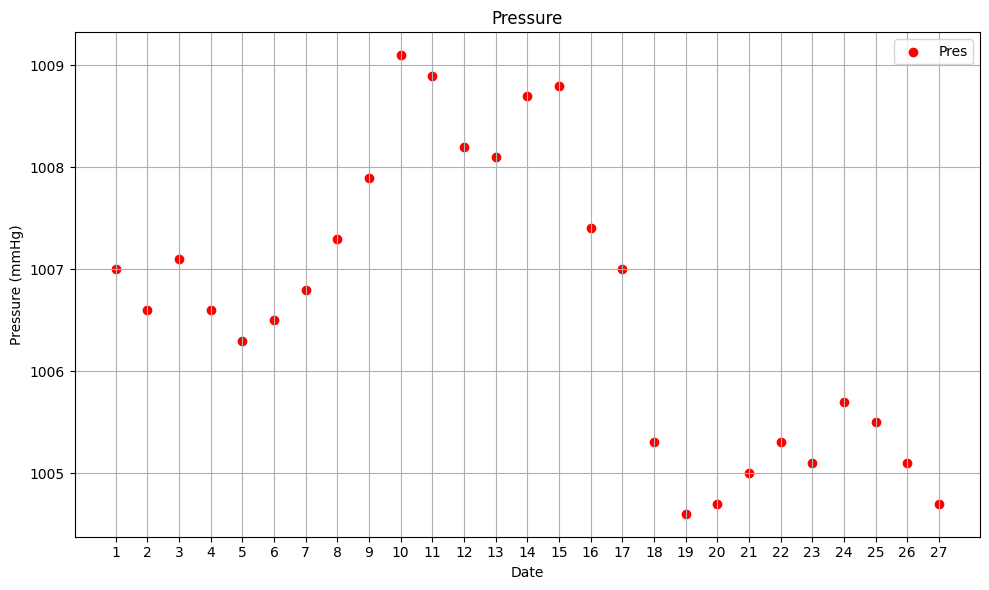

In [59]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(days, pres, color='red', label='Pres')  # Scatter plot with customized color and label
plt.title('Pressure')
plt.xlabel('Date')
plt.ylabel('Pressure (mmHg)')
plt.xticks(days)  # Set x-axis ticks to be exactly the days provided
plt.grid(True)  # Add grid for better visualization
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Trend

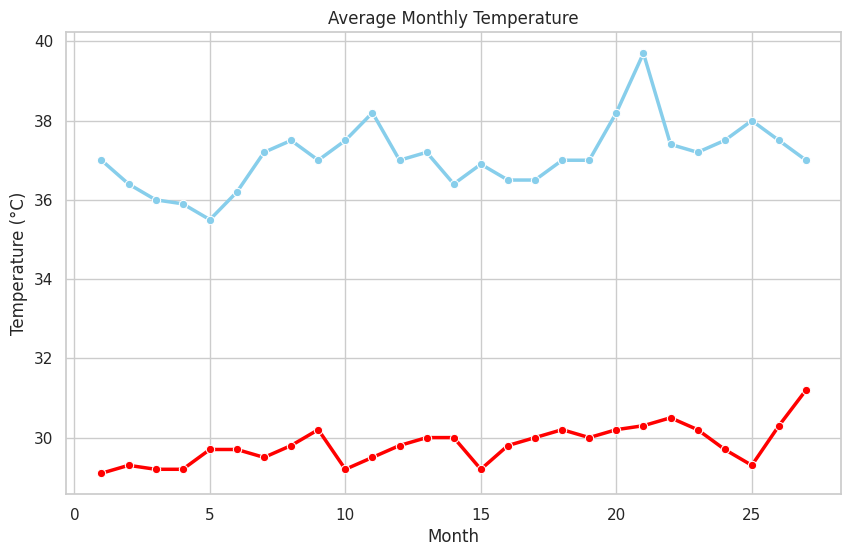

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn line plot
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=days, y=tempA, marker='o', color='skyblue', linewidth=2.5)  # Create the line plot
sns.lineplot(x=days, y=tempN, marker='o', color='red', linewidth=2.5)  # Create the line plot

# Add titles and labels
plt.title('Average Daily Temperature in April 2024')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Show the plot
plt.show()


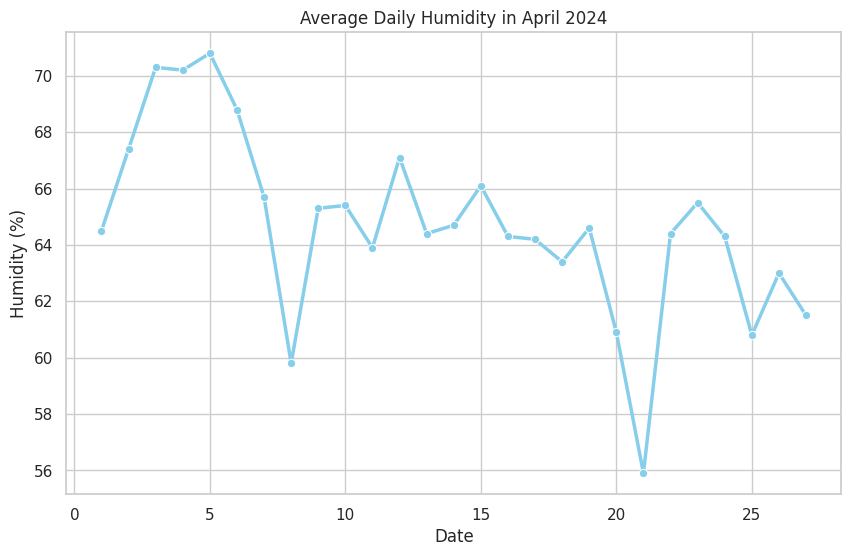

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn line plot
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=days, y=humi, marker='o', color='skyblue', linewidth=2.5)  # Create the line plot
# Add titles and labels
plt.title('Average Daily Humidity in April 2024')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')

# Show the plot
plt.show()


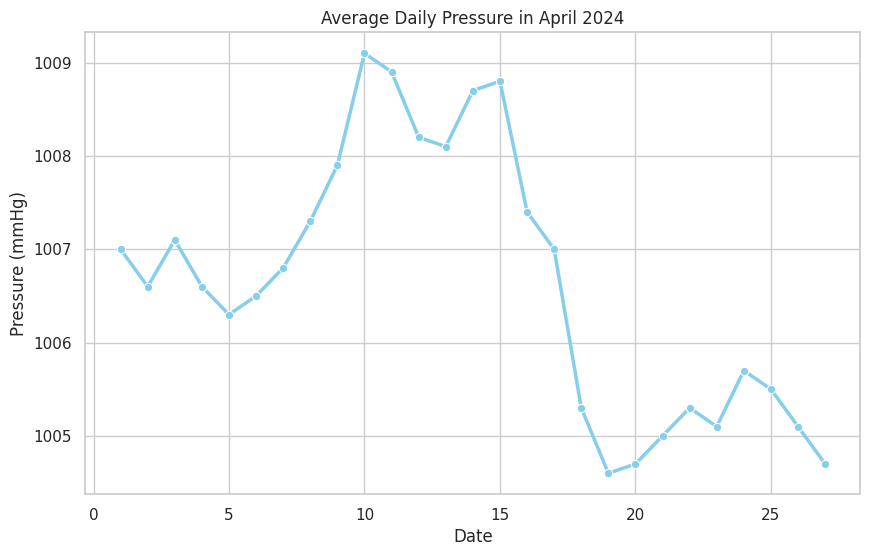

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn line plot
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=days, y=pres, marker='o', color='skyblue', linewidth=2.5)  # Create the line plot
# Add titles and labels
plt.title('Average Daily Pressure in April 2024')
plt.xlabel('Date')
plt.ylabel('Pressure (mmHg)')

# Show the plot
plt.show()
